In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#vulDf = pd.read_csv('/project/biocomplexity/MeaslesProject/APCDdata/vhi.org/Medical_Claims/monthlyAPCDData/UVA_Medical_Claims_2016/UVA_Medical_Claims_2016_March_2022_1.txt', sep='|')

In [2]:
import geopandas as gpd

shapefile = gpd.read_file("tl_2013_us_zcta510.shp")
print(shapefile)


      ZCTA5CE10 GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  AWATER10  \
0         43451   43451        B5   G6350          S   63411475    157689   
1         43452   43452        B5   G6350          S  121783680  13437379   
2         43456   43456        B5   G6350          S    9389360    999166   
3         43457   43457        B5   G6350          S   48035540         0   
4         43458   43458        B5   G6350          S    2573816     39915   
...         ...     ...       ...     ...        ...        ...       ...   
33139     84044   84044        B5   G6350          S  123448529  73182010   
33140     84045   84045        B5   G6350          S   52720600    108625   
33141     84046   84046        B5   G6350          S  333281751   4460752   
33142     84047   84047        B5   G6350          S   16168988         0   
33143     84049   84049        B5   G6350          S  215907749  10468882   

        INTPTLAT10    INTPTLON10  \
0      +41.3183010  -083.6174935   
1  

In [3]:
#print(type(shapefile['GEOID10'][1:2][0:2]))
MMRbyZip= pd.read_csv('/home/cbn7xr/Measles/mmr-counts.txt', sep=' ', index_col=False)
print(MMRbyZip)

shapefile1=shapefile.loc[shapefile.GEOID10.isin(MMRbyZip['zipcode'])].copy()

#print(shapefile1)

     zipcode  2016  2017  2018  2019  2020
0      22102   155   201   184   223   162
1      23111   337   473   460   587   520
2      22192   642   801   769   831  1042
3      22405   257   408   363   499   571
4      23860   461   669   605   662   798
...      ...   ...   ...   ...   ...   ...
1669   22548     0     0     0     0     1
1670   85710     0     0     0     0     1
1671   44501     0     0     0     0     1
1672   90703     0     0     0     0     1
1673   77406     0     0     0     0     1

[1674 rows x 6 columns]


In [4]:
shapefile1["NEIGHBORS"] = None  
adjList = pd.DataFrame(columns=['source', 'target'])

zipcodetoIndex=dict(zip(shapefile1.GEOID10, np.arange(shapefile1.GEOID10.shape[0])))
indextoZipcode=dict(zip(np.arange(shapefile1.GEOID10.shape[0]),shapefile1.GEOID10))

In [ ]:


#/project/biocomplexity/anil/APCD/data/



for index, GEOID10 in shapefile1.iterrows():   

    # get 'not disjoint' countries
    neighbors = shapefile1[~shapefile1.geometry.disjoint(GEOID10.geometry)].GEOID10.tolist()

    # remove own name of the country from the list
    #print(shapefile1.GEOID10[index])
    #print(neighbors)
    neighbors = [ name for name in neighbors if shapefile1.GEOID10[index] != name ]
    #print(neighbors)
    for neighbor in neighbors:
        df2 = {'source': zipcodetoIndex[shapefile1.GEOID10[index]], 'target': zipcodetoIndex[neighbor]}
        adjList = adjList.append(df2, ignore_index = True)
    #display(adjList)
    #break

    # add names of neighbors as NEIGHBORS value
    shapefile1.at[index, "NEIGHBORS"] = ", ".join(neighbors)
   
# save GeoDataFrame as a new file
f="/home/cbn7xr/Measles/adjListZipcode.csv"
adjList.to_csv(f, encoding='utf-8', index=False)

#gdf.to_file("c:/path/to/newfile.shp")

In [ ]:
shapefile1.GEOID10.shape[0]

In [ ]:
shapefile1.GEOID10

In [ ]:
###**********count and population from APCD data

count=pd.read_csv('/home/cbn7xr/Measles/mmr-counts.txt',sep=' ', index_col=False)
population=pd.read_csv('/home/cbn7xr/Measles/patient-counts.txt',sep=' ',index_col=False)
nodeProp=pd.DataFrame(columns=['node', 'count', 'population'])

for zc in shapefile1.GEOID10:
    countz=count.loc[count['zipcode']==zc].copy()
    populationz=population.loc[population['zipcode']==zc].copy()
    #print(countz)
    df2 = {'node': zc, 'count': countz['2016'].sum(),'population':populationz['2016'].sum()}
    nodeProp = nodeProp.append(df2, ignore_index = True)
    #break
    
print(population)
print(nodeProp)

In [ ]:
personTraitVA=pd.read_csv('/project/biocomplexity/mat3kk/va_persontrait_w_imm_mod.csv',skiprows=1)

In [ ]:
personTraitVA

In [ ]:
import geopy
import pandas as pd


def get_zipcode(geolocator, lat_field, lon_field):
    location = geolocator.reverse((lat_field, lon_field))
    #print(df[lat_field])
    #print(location.raw['address']['postcode'])
    #print(location.raw['address'])
    if 'postcode' in location.raw['address']:
        return location.raw['address']['postcode'][0:5]
    else:
        return np.nan
    
geolocator = geopy.Nominatim(user_agent='1234')
#zipcodes = np.zeros(personTraitVA.shape[0])
#for i in np.arange(personTraitVA.shape[0]):
#    zipcodes[i]=get_zipcode()

#zipcodes = personTraitVA.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='home_latitude', lon_field='home_longitude')

uBlock=personTraitVA['block_no'].unique()
blockLat=np.zeros((personTraitVA.shape[0]))
blockLon=np.zeros((personTraitVA.shape[0]))
blockZipCode=np.zeros((personTraitVA.shape[0]))
i=0

for b in uBlock:
    bc=personTraitVA[personTraitVA['block_no'] == b].copy()
    fi=bc.index.values[0]
    alli=bc.index.values
    blockLat[alli]=personTraitVA['home_latitude'][fi]
    blockLon[alli]=personTraitVA['home_longitude'][fi]
    
    zc=get_zipcode(geolocator, personTraitVA['home_latitude'][fi], personTraitVA['home_longitude'][fi])
    try:
        float(zc)
        blockZipCode[alli]=zc
    except ValueError:
        print("ddd")
    i=i+1
    if i%100==0:
        print(i)
    
personTraitVA['blockLat']  =blockLat
personTraitVA['blockLon']  =blockLon
personTraitVA['blockZipCode']  =blockZipCode

    

In [ ]:
personTraitVA.to_csv("personTraitVA.csv", encoding='utf-8', index=False)

In [11]:
personTraitVA= pd.read_csv("personTraitVA.csv")
#personTraitVA= pd.read_csv("/home/cbn7xr/Measles/va_2017_blkgrp_centroids.csv")
#personTraitVA= pd.read_csv("/project/biocomplexity/nssac/EpiHiperSynPop/v1.9.0/usa_va_2017_SynPop/va_persontrait_epihiper.txt")

print(personTraitVA)

             pid      hid  age age_group  gender  county_fips  home_latitude  \
0              0        0   52         o       1        51001      37.940856   
1              1        0   55         o       2        51001      37.940856   
2              2        1   50         o       2        51001      37.944467   
3              3        1   57         o       1        51001      37.944467   
4              4        2   33         a       2        51001      37.936801   
...          ...      ...  ...       ...     ...          ...            ...   
7688054  7688054  3094490   11         s       1        51840      39.138766   
7688055  7688055  3094490   52         o       2        51840      39.138766   
7688056  7688056  3094491   26         a       1        51840      39.152056   
7688057  7688057  3094491   24         a       2        51840      39.152056   
7688058  7688058  3094492   23         a       2        51840      39.143768   

         home_longitude  employment_sta

In [ ]:
personTraitVA= pd.read_csv("personTraitVA.csv")

adjList = pd.read_csv('/home/cbn7xr/Measles/adjListZipcode.csv')
zcU=np.arange(shapefile1.GEOID10.shape[0])
#nodePropfromPerTrait=pd.DataFrame(columns=['node', 'count', 'population'])
node=np.zeros((zcU.shape[0]), dtype=int)
count=np.zeros((zcU.shape[0]), dtype=int)
population=np.zeros((zcU.shape[0]),dtype=int)
zipcodeNumber=np.zeros((zcU.shape[0]),dtype=int)
i=0
for zc in zcU:
    zcpt=personTraitVA.loc[personTraitVA['blockZipCode']==float(indextoZipcode[zc])].copy()
    zcptVaccine=personTraitVA.loc[(personTraitVA['blockZipCode']==float(indextoZipcode[zc]))&(personTraitVA['vacc_status']==0)].copy()
    
    node[i]=zc
    population[i]=zcpt.shape[0]
    count[i]=zcptVaccine.shape[0]
    zipcodeNumber[i]=indextoZipcode[zc]
    #print(zcpt)
    i+=1
nodePropfromPerTrait = pd.DataFrame(node, columns = ['node'])  
nodePropfromPerTrait['zipcode']=zipcodeNumber
nodePropfromPerTrait['population']=population
nodePropfromPerTrait['nVaccCount']=count
print(nodePropfromPerTrait)

In [ ]:

nodePropfromPerTrait.to_csv("/home/cbn7xr/Measles/nodePropfromPerTrait.csv", encoding='utf-8', index=False)

In [ ]:
(nodePropfromPerTrait['population']!=0).sum()

In [3]:
Data = pd.read_csv('/home/cbn7xr/Measles/adjListZipcode.csv')
Data

,source,target
0,0,1
1,0,467
2,0,525
3,0,603
4,0,628
...,...,...
5301,1452,640
5302,1452,641
5303,1452,834
5304,1452,835


In [ ]:
zipcodeAdj = open('/home/cbn7xr/Measles/adjListZipcode.csv', "r")
next(zipcodeAdj, None)  # skip the first line in the input file
G = nx.Graph()


#G = nx.parse_edgelist(zipcodeAdj, delimiter=',', create_using=Graphtype,nodetype=int)
zipcodeAdj = pd.read_csv('/home/cbn7xr/Measles/adjListZipcode.csv')
G.add_nodes_from(nodePropfromPerTrait.node.unique())

nx.set_node_attributes(G, nodePropfromPerTrait['nVaccCount'],'count')
nx.set_node_attributes(G, nodePropfromPerTrait['population'], 'population')

for index, row in zipcodeAdj.iterrows():
    G.add_edge(row['source'], row['target'])

In [ ]:
G.nodes.data

In [ ]:



class APDM_Writer():

    def __init__(self):
        return

    def write(self, outfname, G, S=None, name=None):
        if name is None:
            name = "null"
        with open(outfname, 'w') as f:
            self._write_header(f)
            self._write_section1(f, G, name)
            self._write_section2(f, G)
            self._write_section3(f, G)
            self._write_section4(f, S)

    def _write_header(self, f):
        f.write("#################################################################\n")
        f.write("#APDM Input Graph, this input graph includes 3 sections:\n")
        f.write("#section1 : general information\n")
        f.write("#section2 : nodes\n")
        f.write("#section3 : edges\n")
        f.write("#section4 : trueSubGraph (Optional)\n")
        f.write("#\n")
        f.write("#if nodes haven't information set weight to null\n")
        f.write("#if nodes haven't information set weight to null\n")
        f.write("#################################################################\n")

    def _write_section1(self, f, G, name):
        f.write("SECTION1 (General Information)\n")
        f.write("numNodes = %s\n" % len(G))
        f.write("numEdges = %s\n" % G.number_of_edges())
        f.write("usedAlgorithm = KCCSM\n")
        f.write("dataSource = %s\n" % name)
        f.write("END\n")
        f.write("#################################################################\n")
        
    def _write_section2(self, f, G):
        f.write("SECTION2 (Node Information)\n")
        f.write("NodeID Weight\n")
        for node, data in G.nodes(data=True):
            count = data['count'] if 'count' in data else "null"
            population = data['population'] if 'population' in data else "null"
            f.write("%s %s %s\n" % (node, count, population))
        f.write("END\n")
        f.write("#################################################################\n")

    def _write_section3(self, f, G):
        f.write("SECTION3 (Edges Information)\n")
        f.write("EndPoint0 EndPoint1 Weight\n")
        for u, v, data in G.edges(data=True):
            weight = data['weight'] if 'weight' in data else "null"
            f.write("%s %s %s\n" % (u, v, weight))
        f.write("END\n")
        f.write("#################################################################\n")

    def _write_section4(self, f, S):
        f.write("SECTION4 (TrueSubgraphInformation)\n")
        f.write("EndPoint0 EndPoint1 Weight\n")
        if S is None:
            f.write("null\n")
        else:
            for node, data in S.nodes(data=True):
                count = data['count'] if 'count' in data else "null"
                f.write("%s %s %s\n" % (node, node, count))
        f.write("END\n")
        f.write("#################################################################\n")


class APDM_Reader():

    def __init__(self):
        return

    def read(self, fname):
        G = nx.Graph()
        S = set()
        with open(fname) as f:
            # read number of nodes and edges
            n, m = self._read_section1(f)
            # read nodes
            self._read_section2(f, G)
            assert(len(G) == n)
            # read edges
            total = self._read_section3(f, G)
            assert(total == m)
            # read true subgraph 
            S = self._read_section4(f)
        return G, S

    def _read_section1(self, f):
        line = f.readline()
        while not line.startswith('SECTION1'):
            line = f.readline()
        n = int(f.readline().strip().split()[-1])
        m = int(f.readline().strip().split()[-1])
        return n, m

    def _read_section2(self, f, G):
        line = f.readline()
        while not line.startswith('SECTION2'):
            line = f.readline()
        line = f.readline()
        line = f.readline()
        while not line.startswith('END'):
            tokens = line.strip().split()
            node = int(tokens[0])
            G.add_node(node)
            if tokens[1] != "null":
                G.node[node]['count'] = float(tokens[1])
            if tokens[2] != "null":
                G.node[node]['population'] = float(tokens[2])
            line = f.readline()

    def _read_section3(self, f, G):
        total = 0
        line = f.readline()
        line = f.readline()
        line = f.readline()
        line = f.readline()
        while not line.startswith('END'):
            total += 1
            tokens = line.strip().split()
            u, v, weight = int(tokens[0]), int(tokens[1]), tokens[2]
            assert(u in G and v in G)
            if weight == "null":
                G.add_edge(u, v)
            else:
                G.add_edge(u, v, weight=float(weight))
            line = f.readline()
        return total

    def _read_section4(self, f):
        line = f.readline()
        line = f.readline()
        line = f.readline()
        line = f.readline()
        if line.strip() == "null":
            return None
        S = set()
        while not line.startswith('END'):
            tokens = line.strip().split()
            u, v, weight = int(tokens[0]), int(tokens[1]), tokens[2]
            assert(u == v)
            S.add(u)
            line = f.readline()
        return S

In [ ]:
apdmNet=APDM_Writer()
apdmNetWrite=apdmNet.write("/home/cbn7xr/Measles/virginiaZipcodeNet.apdm", G)

In [21]:
len(cluster3)

9

In [5]:
cluster1=[1441, 1439, 1000, 809, 843, 1291, 110, 112, 1008, 113, 819, 820, 822, 823, 824, 825, 1023, 1037, 1297, 1011, 1012, 1014, 472, 473, 476, 1324, 1325, 477]
cluster2=[72, 64, 1287, 1245, 1246, 95, 1247, 119, 1260, 1251, 1253, 1227, 1263]
cluster3=[516, 422, 1046, 519, 423, 407, 408, 425, 557]

In [29]:
cluster1zip=np.zeros(shapefile1.GEOID10.shape[0])
cluster2zip=np.zeros(shapefile1.GEOID10.shape[0])
cluster3zip=np.zeros(shapefile1.GEOID10.shape[0])
clusterAllzip=np.zeros(shapefile1.GEOID10.shape[0])
print(shapefile1.GEOID10.shape[0])
#c=0
for i in cluster1:
    cluster1zip[i]=1
    clusterAllzip[i]=3
    #c+=1
    

for i in cluster2:
    cluster2zip[i]=1
    clusterAllzip[i]=2
    
   
    

for i in cluster3:
    cluster3zip[i]=1
    clusterAllzip[i]=1
    
cl_dataframe=pd.DataFrame(cluster1zip, columns=['cluster1'])   
cl_dataframe['cluster2']=cluster2zip
cl_dataframe['cluster3']=cluster3zip
cl_dataframe['clusterAll']=clusterAllzip


1455


In [15]:
cl_dataframe.to_csv('cl_dataframe.csv')

In [12]:
c=[]
for i in cluster3:
    c.append(indextoZipcode[i])
    
print(c)

['23832', '23235', '23219', '23836', '23236', '23225', '23226', '23237', '23838']


In [31]:
shapefile1['c1']=cluster1zip
shapefile1['c2']=cluster2zip
shapefile1['c3']=cluster3zip
shapefile1['call']=clusterAllzip

In [35]:
shapefile1

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,NEIGHBORS,c1,c2,c3,call
675,23085,23085,B5,G6350,S,111497584,1533306,+37.7154567,-076.8319889,"POLYGON ((-76.91587 37.68449, -76.91601 37.684...",None,0.0,0.0,0.0,0.0
680,23086,23086,B5,G6350,S,214079105,8271160,+37.6685728,-077.0544136,"POLYGON ((-77.00543 37.70132, -77.00426 37.700...",None,0.0,0.0,0.0,0.0
683,23089,23089,B5,G6350,S,156976950,16549281,+37.4557737,-076.9035210,"POLYGON ((-76.88628 37.42238, -76.88610 37.422...",None,0.0,0.0,0.0,0.0
685,23091,23091,B5,G6350,S,60033081,1735808,+37.6509583,-076.7990176,"POLYGON ((-76.86881 37.62401, -76.86813 37.624...",None,0.0,0.0,0.0,0.0
687,23092,23092,B5,G6350,S,12706442,5890337,+37.6067689,-076.5147485,"POLYGON ((-76.50210 37.60916, -76.50185 37.609...",None,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32415,24053,24053,B5,G6350,S,142320946,113336,+36.6072273,-080.5340761,"POLYGON ((-80.59025 36.66255, -80.59021 36.662...",None,0.0,0.0,0.0,0.0
32420,24054,24054,B5,G6350,S,278575835,541114,+36.6688916,-079.7054256,"POLYGON ((-79.82281 36.63181, -79.82294 36.632...",None,0.0,0.0,0.0,0.0
32802,23060,23060,B5,G6350,S,39306482,407031,+37.6561532,-077.5377835,"MULTIPOLYGON (((-77.56876 37.64415, -77.56903 ...",None,0.0,0.0,0.0,0.0
32808,23061,23061,B5,G6350,S,405632928,89980306,+37.4277306,-076.5375835,"POLYGON ((-76.40479 37.40036, -76.40390 37.396...",None,0.0,0.0,0.0,0.0


In [36]:
vazcdf=pd.read_csv('VAzipcodes.csv')
vazc=vazcdf.zip.astype(str).unique()
vagdf=gpd.read_file('va_zipcode.shp')
vagdf=vagdf.rename(columns={'ZCTA5CE10':'#zipcode'})

In [43]:
shapefile1=shapefile1[shapefile1['GEOID10'].isin(vazc)]

SyntaxError: invalid syntax (<ipython-input-43-8442a09f051e>, line 1)

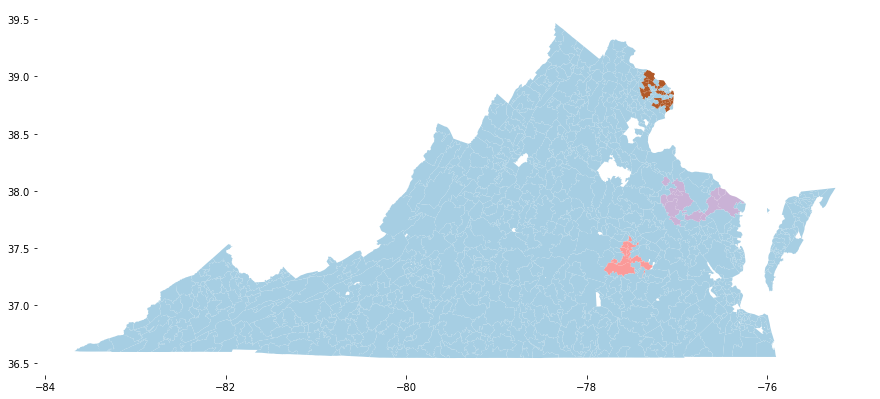

In [71]:
plt=shapefile1.plot(column='call',cmap='Paired',figsize=(15, 10),)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.spines[pos].set_visible(False)
plt.figure.savefig('VA.png',dpi=300)

<AxesSubplot:>

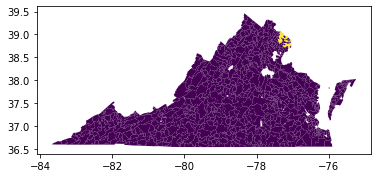

In [41]:
shapefile1.plot(column='c')

<AxesSubplot:>

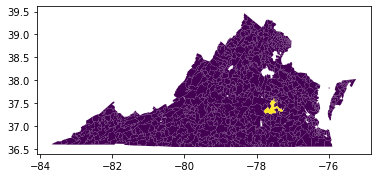

In [17]:
shapefile1.plot(column='c3')

In [9]:
def clusterPid(c):
    cCol=np.zeros((personTraitVA.shape[0]))
    if c==1:
        cl=cluster1
    elif c==2:
        cl=cluster2
    else:
        cl = cluster3
    for i in cl:
        #print(i)
    
        zipc=indextoZipcode[i]
        personTraitVAzip=personTraitVA.loc[personTraitVA['blockZipCode']==float(zipc)].copy()

        #print(zipc)
        #print(personTraitVAzip['pid'].to_numpy().size)
        if personTraitVAzip.shape[0]>0:
            cCol[personTraitVAzip['pid'].to_numpy()]=1
    
    return cCol

In [32]:
### pid cluster columns
clusterCol=np.zeros((personTraitVA.shape[0],4), dtype=int)
clusterCol[:,0]=personTraitVA.pid
print(clusterCol.sum(axis=0))
for i in np.arange(3):
    
    cCol=clusterPid(i+1)
    print(sum(cCol))
    clusterCol[:,i+1]=cCol
    print(sum(cCol))
    
print(clusterCol.sum(axis=0))

[29553121749711              0              0              0]
610464.0
610464.0
24302.0
24302.0
190832.0
190832.0
[29553121749711         610464          24302         190832]


In [33]:
clusterColdf = pd.DataFrame(clusterCol, columns = ['pid','cluster1','cluster2','cluster3'])
clusterColdf.to_csv("/project/biocomplexity/cbn7xr/measles/Measles_Run/varying_tau_2/clusterPID.csv", encoding='utf-8', index=False)

In [31]:
clusterCol

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       [2.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       ...,
       [7.688056e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       [7.688057e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       [7.688058e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00]])